In [1]:
!pip install datasets transformers rouge-score

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.1/316.1 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 6.8 MB/s eta 0:00:00
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=d7a02c8901a38223f926cbc5f170a18e00f070ba1b5924c71b2d90a0c8abd889
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge-score
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling req

In [2]:
import os
os.environ['TF_USE_LEGACY_KERAS'] = '1'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('bbc-news-data-updated.csv')

df.head()

,title,content
0,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...


In [11]:
df.shape

(2422, 2)

In [12]:
df.isna().sum()

,0
title,0
content,0


In [13]:
df = df.copy()
df['title'] = df['title'].str.lower()
df['content'] = df['content'].str.lower()

df.head()

,title,content
0,ad sales boost time warner profit,quarterly profits at us media giant timewarne...
1,dollar gains on greenspan speech,the dollar has hit its highest level against ...
2,yukos unit buyer faces loan claim,the owners of embattled russian oil giant yuk...
3,high fuel prices hit ba's profits,british airways has blamed high fuel prices f...
4,pernod takeover talk lifts domecq,shares in uk drinks and food firm allied dome...


In [14]:
df.shape

(2422, 2)

In [15]:
from sklearn.model_selection import train_test_split

#splitting data 70-15-15
df_train, df_temp = train_test_split(df, test_size=0.3, random_state=1)
df_val, df_test = train_test_split(df_temp, test_size=0.5, random_state=1)

print(f'training matrix size: {df_train.shape}')
print(f'validating matrix size: {df_val.shape}')
print(f'testing matrix size: {df_test.shape}')

training matrix size: (1695, 2)
validating matrix size: (363, 2)
testing matrix size: (364, 2)


In [16]:
df['content_length'] = df['content'].apply(lambda x: len(x))
df['title_length'] = df['title'].apply(lambda x: len(x))

df.head()

,title,content,content_length,title_length
0,ad sales boost time warner profit,quarterly profits at us media giant timewarne...,2525,33
1,dollar gains on greenspan speech,the dollar has hit its highest level against ...,2219,32
2,yukos unit buyer faces loan claim,the owners of embattled russian oil giant yuk...,1517,33
3,high fuel prices hit ba's profits,british airways has blamed high fuel prices f...,2367,33
4,pernod takeover talk lifts domecq,shares in uk drinks and food firm allied dome...,1535,33


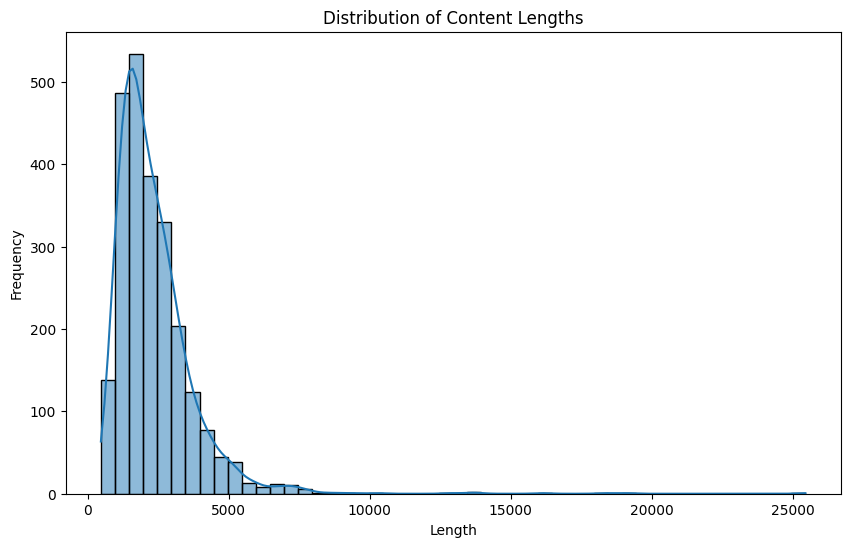

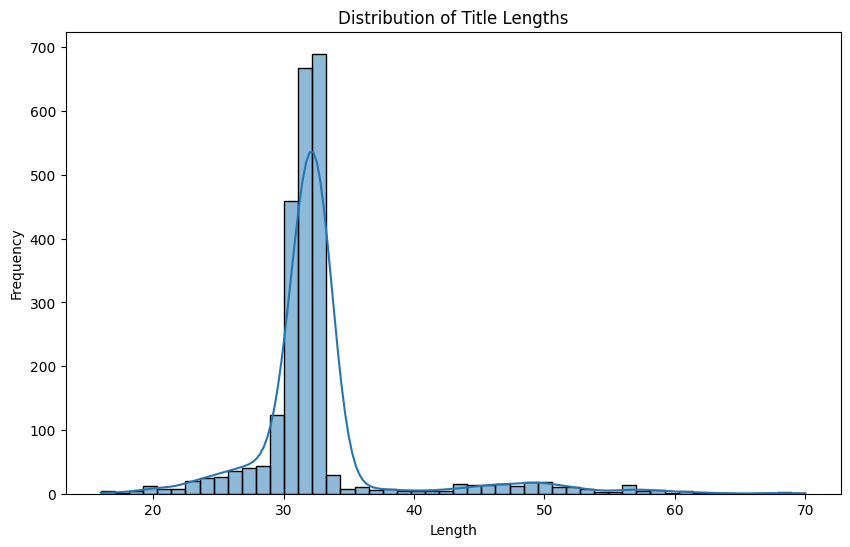

In [18]:
# Plot the distribution of content lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['content_length'], bins=50, kde=True)
plt.title('Distribution of Content Lengths')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of title lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['title_length'], bins=50, kde=True)
plt.title('Distribution of Title Lengths')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

In [19]:
from datasets import Dataset, DatasetDict

# Convert to Hugging Face Datasets
train_dataset = Dataset.from_pandas(df_train)
val_dataset = Dataset.from_pandas(df_val)
test_dataset = Dataset.from_pandas(df_test)

dataset_dict = DatasetDict({
    'train': train_dataset,
    'validation': val_dataset,
    'test': test_dataset
})

print(dataset_dict)

DatasetDict({
    train: Dataset({
        features: ['title', 'content', '__index_level_0__'],
        num_rows: 1695
    })
    validation: Dataset({
        features: ['title', 'content', '__index_level_0__'],
        num_rows: 363
    })
    test: Dataset({
        features: ['title', 'content', '__index_level_0__'],
        num_rows: 364
    })
})


In [20]:
from transformers import TFAutoModelForSeq2SeqLM, T5Tokenizer

# Initialize the model
model = TFAutoModelForSeq2SeqLM.from_pretrained('t5-small')

# Initialize the tokenizer
tokenizer = T5Tokenizer.from_pretrained('t5-small')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFT5ForConditionalGeneration.

All the weights of TFT5ForConditionalGeneration were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFT5ForConditionalGeneration for predictions without further training.


tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [21]:
# Tokenize the datasets
def tokenize_function(examples):
    model_inputs = tokenizer(examples['content'], max_length=512, padding='max_length', truncation=True)
    labels = tokenizer(examples['title'], max_length=35, padding='max_length', truncation=True)
    model_inputs['labels'] = labels['input_ids']
    return model_inputs

tokenized_datasets = dataset_dict.map(tokenize_function, batched=True)

Map:   0%|          | 0/1695 [00:00<?, ? examples/s]

Map:   0%|          | 0/363 [00:00<?, ? examples/s]

Map:   0%|          | 0/364 [00:00<?, ? examples/s]

In [22]:
print(tokenized_datasets)

DatasetDict({
    train: Dataset({
        features: ['title', 'content', '__index_level_0__', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 1695
    })
    validation: Dataset({
        features: ['title', 'content', '__index_level_0__', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 363
    })
    test: Dataset({
        features: ['title', 'content', '__index_level_0__', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 364
    })
})


In [23]:
from transformers import DataCollatorForSeq2Seq

# Initialize the model
model = TFAutoModelForSeq2SeqLM.from_pretrained('t5-small')

# Initialize the data collator
data_collator = DataCollatorForSeq2Seq(tokenizer, model=model, return_tensors="tf")

# Create TensorFlow datasets using the data collator
tf_train_dataset = model.prepare_tf_dataset(
    tokenized_datasets["train"],
    collate_fn=data_collator,
    shuffle=True,
    batch_size=8,
)

tf_eval_dataset = model.prepare_tf_dataset(
    tokenized_datasets["validation"],
    collate_fn=data_collator,
    shuffle=False,
    batch_size=8,
)

tf_test_dataset = model.prepare_tf_dataset(
    tokenized_datasets["test"],
    collate_fn=data_collator,
    shuffle=False,
    batch_size=8,
)

All PyTorch model weights were used when initializing TFT5ForConditionalGeneration.

All the weights of TFT5ForConditionalGeneration were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFT5ForConditionalGeneration for predictions without further training.


In [24]:
next(iter(tf_train_dataset))

({'input_ids': <tf.Tensor: shape=(8, 512), dtype=int64, numpy=
  array([[    3,  3484,    15, ...,    99,     3,     1],
         [    8,     3,  2960, ...,    23,   265,     1],
         [23407,    29,   740, ...,     0,     0,     0],
         ...,
         [  528,   172,     3, ...,  5362,    47,     1],
         [    3,    32,   120, ...,     0,     0,     0],
         [    8,   388,   492, ...,     0,     0,     0]])>,
  'attention_mask': <tf.Tensor: shape=(8, 512), dtype=int64, numpy=
  array([[1, 1, 1, ..., 1, 1, 1],
         [1, 1, 1, ..., 1, 1, 1],
         [1, 1, 1, ..., 0, 0, 0],
         ...,
         [1, 1, 1, ..., 1, 1, 1],
         [1, 1, 1, ..., 0, 0, 0],
         [1, 1, 1, ..., 0, 0, 0]])>,
  'decoder_input_ids': <tf.Tensor: shape=(8, 35), dtype=int64, numpy=
  array([[    0,  7236,   655,   223,     7,     3, 16331,    21,     3,
              7,  4310,    40,   232,     1,     0,     0,     0,     0,
              0,     0,     0,     0,     0,     0,     0,     0,  

In [25]:
# Verify Data Collator Outputs
input_batch, label_batch = next(iter(tf_eval_dataset))

print("Input batch:")
for key, value in input_batch.items():
    print(f"{key}: {value.numpy()}")

print("\nLabel batch:")
print(label_batch.numpy())

Input batch:
input_ids: [[  178  4539   349 ...     0     0     0]
 [ 4390   915    49 ...   928  1280     1]
 [    8  1710  9897 ...     0     0     0]
 ...
 [  151   338  5419 ...     0     0     0]
 [   34     9   120 ...     0     0     0]
 [ 6164    18 31657 ...     7     9     1]]
attention_mask: [[1 1 1 ... 0 0 0]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 0 0 0]
 ...
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 1 1 1]]
decoder_input_ids: [[    0     3    89     9 11113   954    15     3    31 25351   880   342
   1335    31     1     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0]
 [    0     3 12124    17  3706    10     3    23    47  1807  4250   147
  15154  3315     1     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0]
 [    0     3  3828    32   204   160   138    26     7  2117 16813     1
      0     0     0     0     0     0     0     0

In [26]:
import tensorflow as tf
from tensorflow.keras.optimizers.schedules import PolynomialDecay
from tensorflow.keras.optimizers import Adam

# Define training parameters
num_train_steps = len(tf_train_dataset) * 3  # Number of epochs

lr_scheduler = PolynomialDecay(
    initial_learning_rate=3e-4,
    end_learning_rate=2e-3,
    decay_steps=num_train_steps
)

# Use the Adam optimizer with the custom learning rate schedule
optimizer = Adam(learning_rate=lr_scheduler)

# Compile the model with the correct loss function and accuracy metric
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

model.compile(optimizer=optimizer, loss=loss, metrics=[accuracy])

In [27]:
# Train the model
history = model.fit(
    tf_train_dataset,
    validation_data=tf_eval_dataset,
    epochs=3
)

Epoch 1/3
211/211 [==============================] - 104s 335ms/step - loss: 1.2921 - sparse_categorical_accuracy: 0.8180 - val_loss: 0.6771 - val_sparse_categorical_accuracy: 0.8712
Epoch 2/3
211/211 [==============================] - 76s 361ms/step - loss: 0.6594 - sparse_categorical_accuracy: 0.8749 - val_loss: 0.6837 - val_sparse_categorical_accuracy: 0.8708
Epoch 3/3
211/211 [==============================] - 78s 371ms/step - loss: 0.5708 - sparse_categorical_accuracy: 0.8870 - val_loss: 0.7140 - val_sparse_categorical_accuracy: 0.8698


In [28]:
# Evaluate the model
eval_results = model.evaluate(tf_test_dataset)
print(f"Evaluation results on unseen data: {eval_results}")

46/46 [==============================] - 6s 126ms/step - loss: 0.7046 - sparse_categorical_accuracy: 0.8722
Evaluation results on unseen data: [0.7045948505401611, 0.8722134828567505]


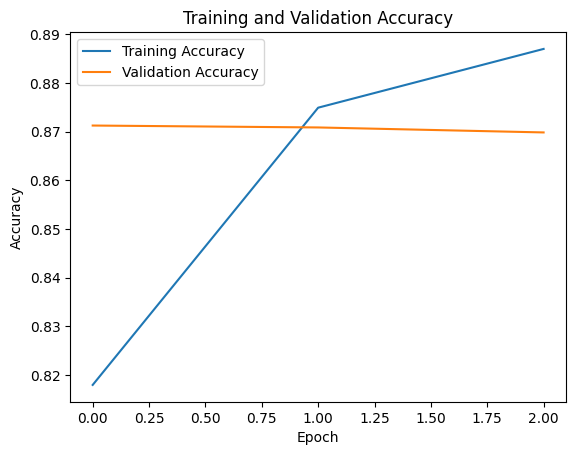

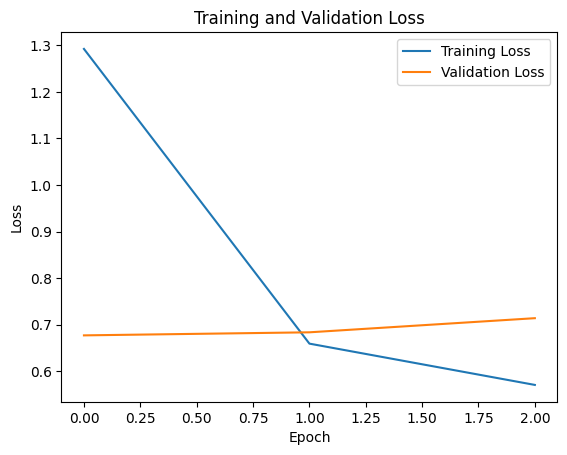

In [29]:
# Plot training and validation accuracy
plt.plot(history.history['sparse_categorical_accuracy'], label='Training Accuracy')
plt.plot(history.history['val_sparse_categorical_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [31]:
# Function to generate title for a given article content
def generate_title(content):
    inputs = tokenizer(content, return_tensors="tf", max_length=512, truncation=True)
    outputs = model.generate(inputs["input_ids"], max_length=20, num_beams=4, early_stopping=True)
    return tokenizer.decode(outputs[0], skip_special_tokens=True)

In [32]:
from rouge_score import rouge_scorer

# Function to compute ROUGE scores
def compute_rouge(predictions, references):
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    scores = [scorer.score(pred, ref) for pred, ref in zip(predictions, references)]
    result = {key: np.median([score[key].fmeasure for score in scores]) * 100 for key in scores[0]}
    return {k: round(v, 4) for k, v in result.items()}

In [33]:
# Evaluate the model on 5 random samples from the test dataset and print the results
def evaluate_model(model, dataset, tokenizer, num_samples=5):
    # Select random samples
    random_indices = np.random.choice(len(dataset), num_samples, replace=False).tolist()
    generated_summaries = []
    reference_summaries = []
    samples = []

    for idx in random_indices:
        sample = dataset[int(idx)]
        content = sample['content']
        reference_summary = sample['title']

        # Generate summary
        generated_summary = generate_title(content)

        generated_summaries.append(generated_summary)
        reference_summaries.append(reference_summary)
        first_50_words = ' '.join(content.split()[:50])
        samples.append((first_50_words, generated_summary, reference_summary))

    # Compute ROUGE scores
    rouge_scores = compute_rouge(generated_summaries, reference_summaries)

    # Print generated and reference summaries side by side with the first 50 words of the article
    print("Generated vs Actual Titles")
    for i, (snippet, generated, reference) in enumerate(samples):
        print(f"Sample {i+1}:")
        print(f"Article Snippet: {snippet}\n")
        print(f"Generated Title: {generated}")
        print(f"Actual Title: {reference}\n")

    return rouge_scores

In [36]:
#Usage of fine-tuned model for demonstration
rouge_scores = evaluate_model(model, tokenized_datasets["test"], tokenizer, num_samples=5)
print("ROUGE Scores:", rouge_scores)

Generated vs Actual Titles
Sample 1:
Article Snippet: greek sprinter kostas kenteris has denied claims that he faked a motorbike crash to avoid a doping test days before the start of the olympics. kenteris and fellow sprinter katerina thanou are set to learn if they will face criminal charges this week. part of the investigation has centred on

Generated Title: kenteris denies doping claim
Actual Title: kenteris denies faking road crash

Sample 2:
Article Snippet: the us trade deficit widened by more than expected in october, hitting record levels after higher oil prices raised import costs, figures have shown the trade shortfall was $55.5bn (£29bn), up 9% from september, the commerce department said. that pushed the 10 month deficit to $500.5bn. imports rose by 3.4%,

Generated Title: us trade deficit hits 'high levels'
Actual Title: us trade gap ballooned in october

Sample 3:
Article Snippet: ken livingstone should "stick to his guns" and not apologise for his "nazi" comment to a je

The results show that the fine-tuned model generates titles that are comparable to those written by BBC staff. This is further supported by the ROUGE metrics.